<a href="https://colab.research.google.com/github/Skygoat23/Entregas/blob/main/ProyectoFinal2%2BAronne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del Proyecto

###Coderhouse 2023 - Comisión 48610.
#####Profesor: Fernando Caracebo
#####Tutor: Nazareno Martincevich
#####Autor: [Nicolas Aronne](https://)

# "Aliméntate como la persona que quieras ser".

# Introducción

Las buenas prácticas alimenticias están siendo tendencia en un mundo donde las personas se vuelven sedentarias, donde los alimentos procesados abundan en el mercado y los problemas cardíacos se incrementan drásticamente.

Es fácil perder de vista la importancia de una alimentación saludable y equilibrada. Pero, ¿qué pasaría si tuviéramos acceso a información detallada sobre los alimentos que consumimos y pudiéramos tomar decisiones más informadas sobre nuestra dieta?

  En Argentina tenemos vigente una ley de etiquetado frontal, donde se mencionan explicitamente los alimentos con exceso en calorías, grasas, azúcares y sodio.

Es interesante en ese sentido presentar soluciones a problemas alimenticios.

# La obesidad en el mundo es un flajelo Global

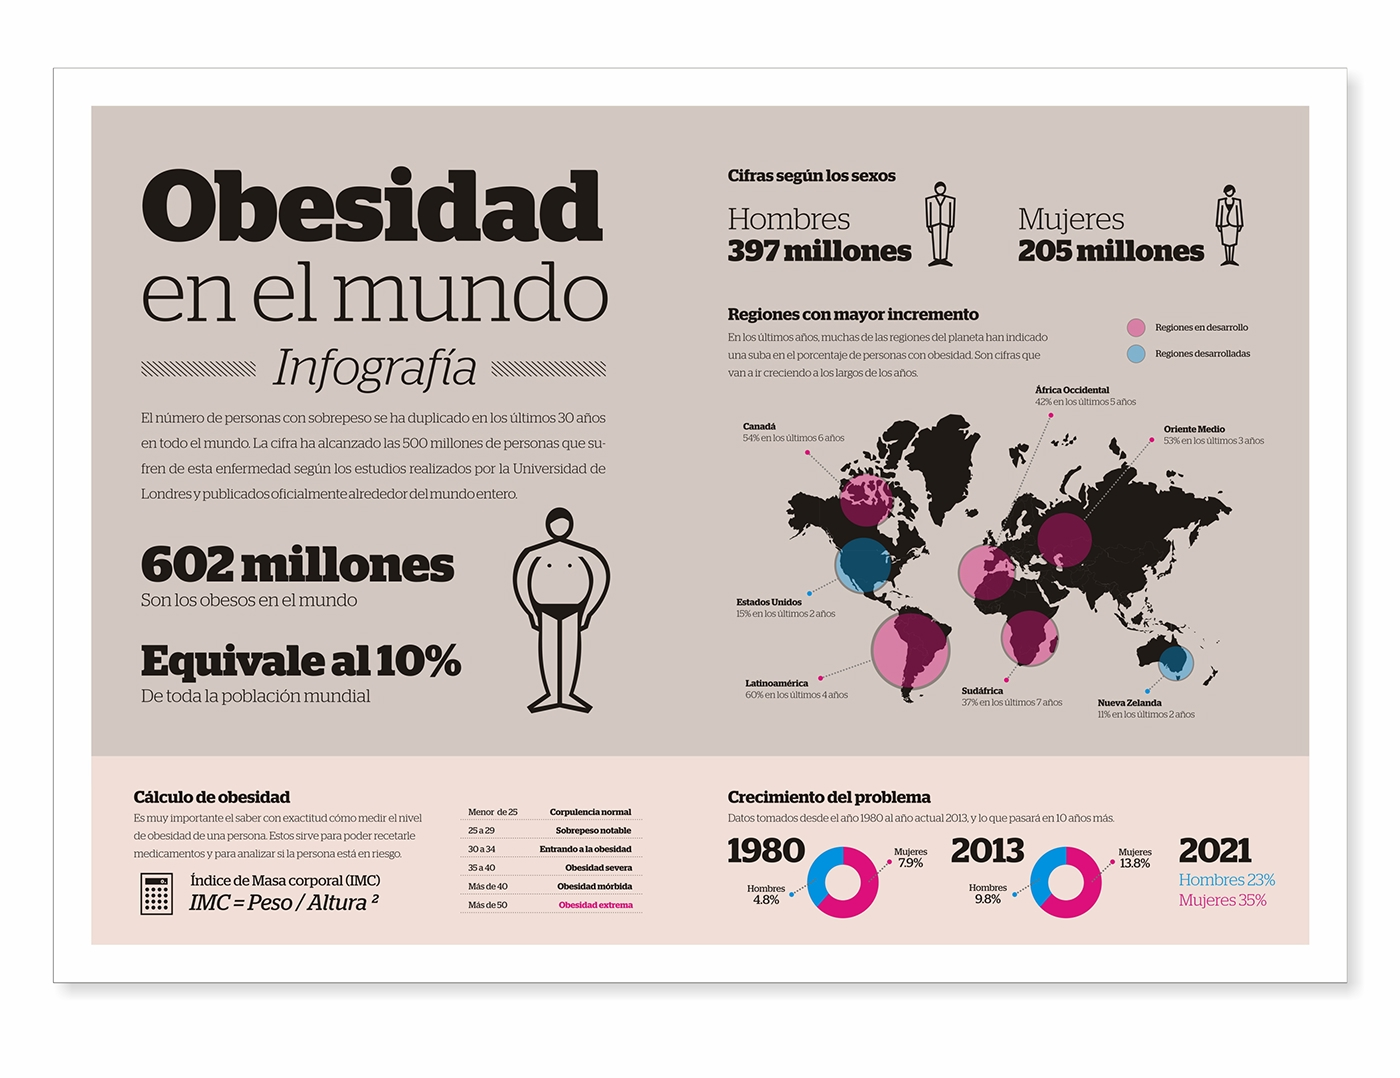

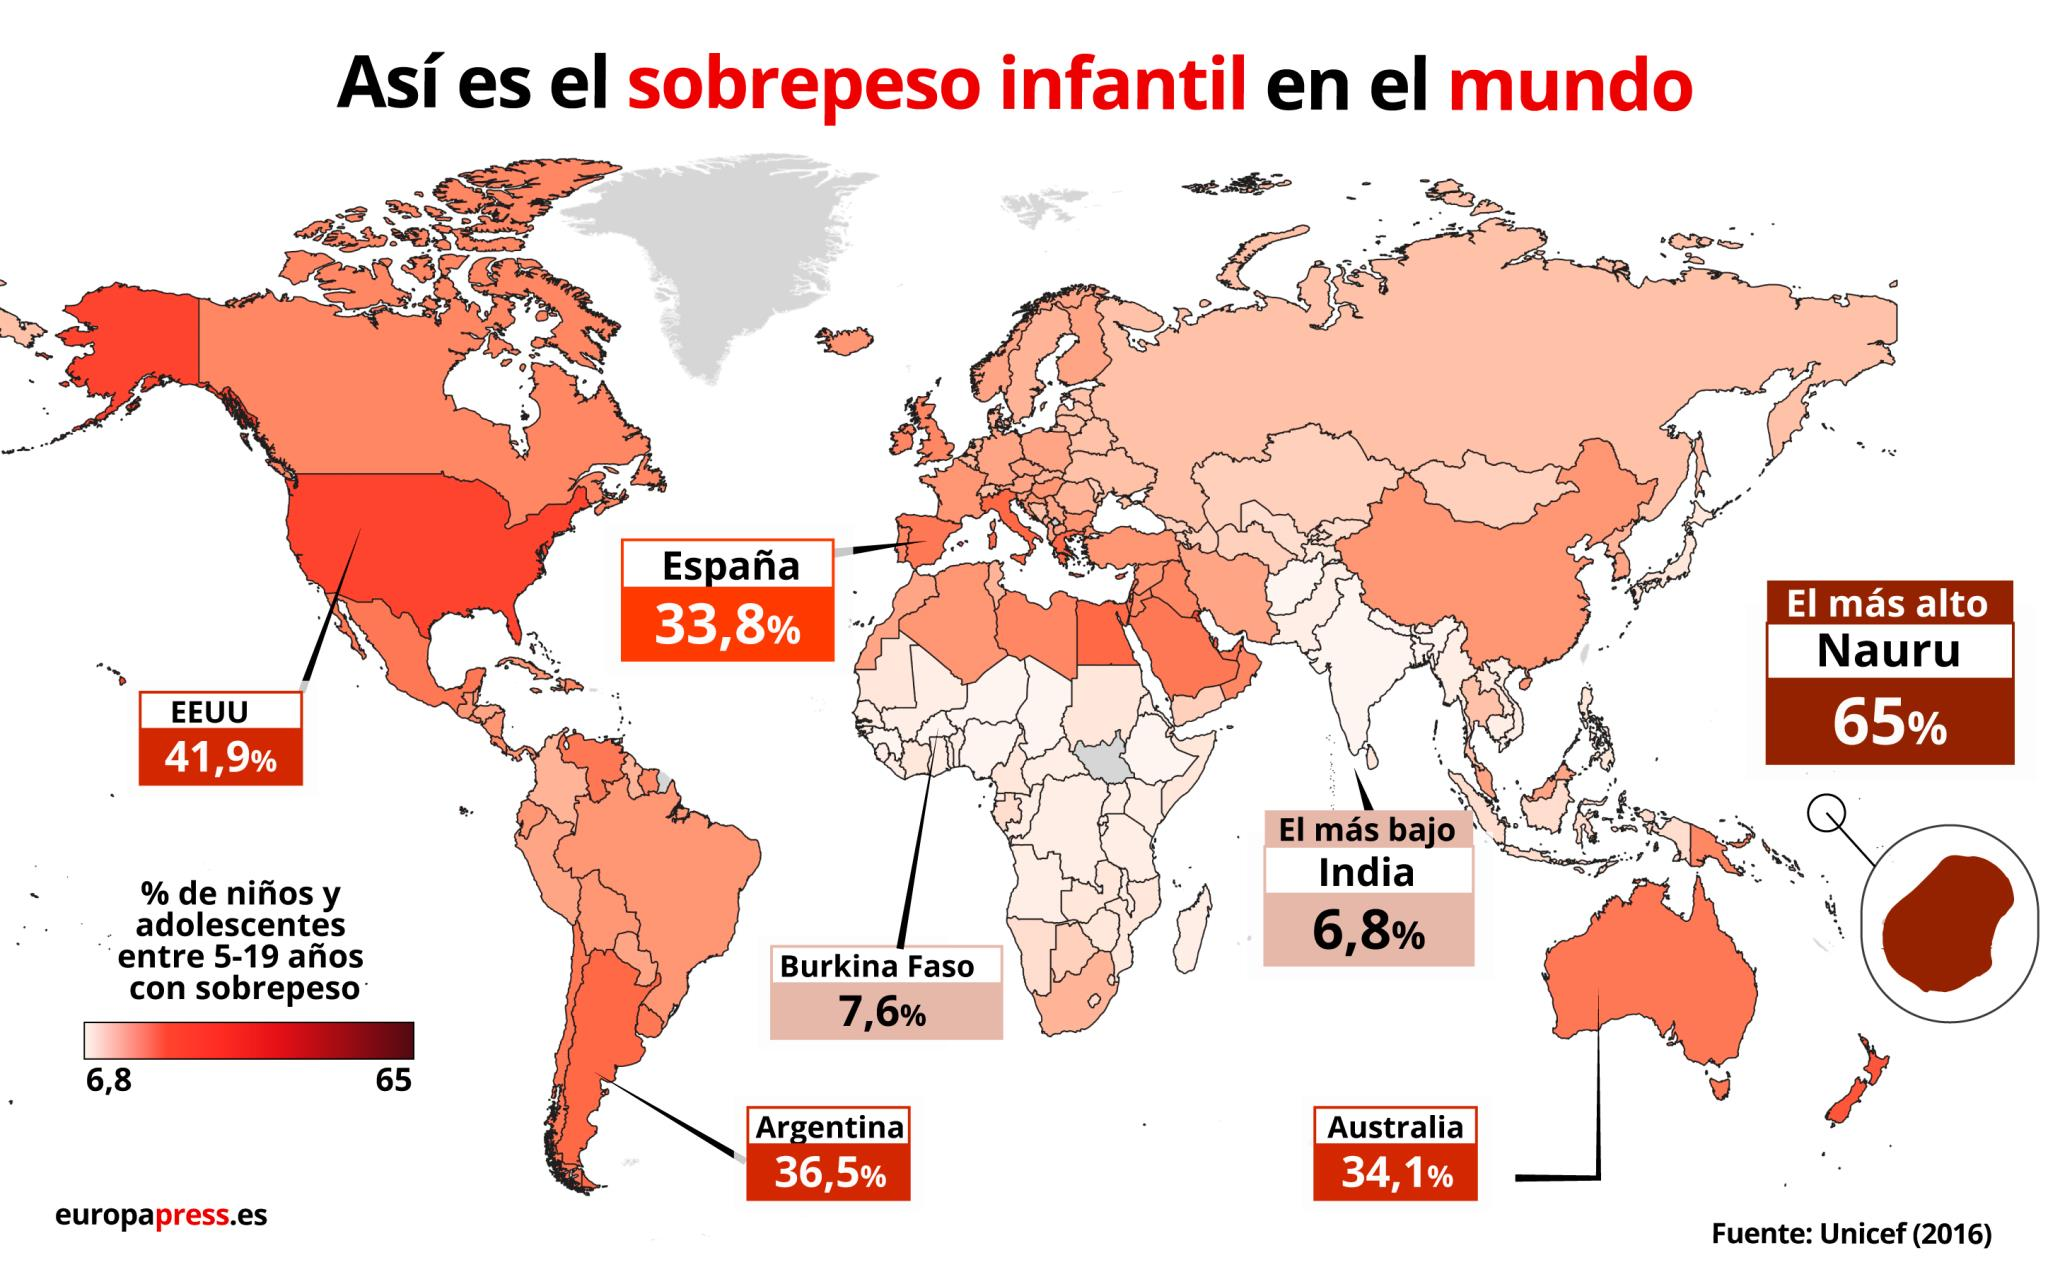

# Definición del Objetivo

Contar con un dataset con información nutricional, nos sirve de base en nuestra hoja de ruta para alimentarnos de manera adecuada, evitando los problemas de salud derivados de la excesiva ingesta de alimentos altos en calorías.

## Los objetivos perseguidos son:

*   Clasificación de alimentos según su contenido nutricional: Poder entrenar un modelo de clasificación para identificar automáticamente el tipo de alimento (frutas, verduras, carnes, etc.) basado en su información nutricional. También clasificar los alimentos en grupos de acuerdo a su valor nutricional, como alimentos ricos en proteínas, alimentos con alto contenido de grasas, etc.
*   Predicción de calorías: Utilizando técnicas de regresión, predecir el número de calorías en los alimentos a partir de su información nutricional.
* Detección de alimentos no saludables: identificar patrones en los datos nutricionales que sean comunes en alimentos poco saludables. De esta manera, determinar qué alimentos tienen un alto contenido de grasas, sodio o azúcares, y sugerir alternativas más saludables.
* Recomendaciones personalizadas de alimentos: Con información adicional (otro dataset) sobre las personas que van a consumir los alimentos (por ejemplo, edad, género, altura, peso, nivel de actividad física), poder recomendar alimentos que satisfagan sus necesidades nutricionales específicas.







# Usuarios del modelo o Enfoque comercial.

El modelo está pensado para ser usados por profesionales de la nutrición, como asi también cualquier persona que quiera controlar su dieta o clasificar alimentos de acuerdo a ciertos requisitos, o predecir las calorías de los alimentos a partir de su información nutricional.

# Contexto Análitico

El dataset fue obtenido de Kaggle.com, consta de 9.318 alimentos con más de 20 cualidades nutricionales.

In [ ]:
#Importamos las librerías

#Visualizaciones
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_palette("mako")

#Manipulación de datos
import pandas as pd
import numpy as np

In [ ]:
#Data Adquisition
food = pd.read_csv("https://raw.githubusercontent.com/Skygoat23/DataScienceCoderhouse/main/food.csv")

# Analisis Exploratorio de Datos (EDA)

Conociendo el Dataset

In [ ]:
#Variable Dependiente maximos y minimos
food.Energy_kcal.max()

902.0

In [ ]:
food.Energy_kcal.min()

0.0

In [ ]:
food.loc[food["Sugar_g"]>20]

NDB_No                                        Descrip  Energy_kcal  \
63     1070                       dessert topping powdered      577.000   
66     1073                 dessert topping semi solid frz      318.000   
82     1090                 milk dry whl w added vitamin d      496.000   
83     1091  milk dry nonfat reg wo added vit a  vitamin d      362.000   
84     1092  milk dry nonfat inst w added vit a  vitamin d      358.000   
...     ...                                            ...          ...   
8969   E019                              dates  processed       286.083   
9007   E057                         raisins  dried  black       305.681   
9008   E058                        raisins  dried  golden       296.599   
9014   E064                                tamarind  pulp       288.473   
9092   I001                                 jaggery  cane       353.720   

      Protein_g  Saturated_fats_g  Fat_g  Carb_g  Fiber_g  Sugar_g  \
63         4.90          36.72300  39.92   52.54     0.00    52.54   
66         1.25          21.78300  25.31   23.05     0.00    23.05   
82        26.32          16.74200  26.71   38.42     0.00    38.42   
83        36.16           0.49900   0.77   51.98     0.00    51.98   
84        35.10           0.46700   0.72   52.19     0.00    52.19   
...         ...               ...    ...     ...      ...      ...   
8969       1.18           0.14900   0.41   67.95     6.52    56.96   
9007       2.57           0.06247   0.34   71.29     3.92    61.51   
9008       2.76           0.12100   0.35   68.79     4.56    57.12   
9014       2.92           0.02726   0.15   67.35     5.31    52.88   
9092       1.85           0.06923   0.16   84.87     0.00    84.32   

      Calcium_mg  ...  VitC_mg Thiamin_mg  Riboflavin_mg  Niacin_mg  VitB6_mg  \
63        17.000  ...     0.00      0.000          0.000      0.000     0.000   
66         6.000  ...     0.00      0.000          0.000      0.000     0.000   
82       912.000  ...     8.60      0.283          1.205      0.646     0.302   
83      1257.000  ...     6.80      0.415          1.550      0.951     0.361   
84      1231.000  ...     5.60      0.413          1.744      0.891     0.345   
...          ...  ...      ...        ...            ...        ...       ...   
8969      15.730  ...    15.51      0.050          0.020      0.510     0.060   
9007      73.240  ...     2.05      0.090          0.040      0.480     0.170   
9008      51.830  ...     1.85      0.090          0.040      0.640     0.170   
9014     149.000  ...     3.62      0.340          0.070      1.560     0.080   
9092       0.006  ...     0.00      0.040          0.010      0.020     0.710   

      Folate_mcg  VitB12_mcg  VitA_mcg  VitE_mg  VitD2_mcg  
63          0.00        0.00      0.00     1.52    0.00000  
66          0.00        0.00      7.00     0.96    0.00000  
82         37.00        3.25    258.00     0.58   10.50000  
83         50.00        4.03      6.00        0    0.00000  
84         50.00        3.99    709.00     0.01   11.00000  
...          ...         ...       ...      ...        ...  
8969       24.53        0.00      0.00     0.03    0.00083  
9007       38.30        0.00      1.08     0.02    0.00176  
9008       34.68        0.00      0.63     0.02    0.01187  
9014        9.79        0.00      0.42      0.1    0.02565  
9092       14.40        0.00      0.00     0.04    0.00000  

[1050 rows x 29 columns]

In [ ]:
#máscara booliana para conocer los alimentos con 0 kcal
food.loc[food["Energy_kcal"]==0]

NDB_No                                            Descrip  Energy_kcal  \
295    2047                                         salt table          0.0   
311    2074         seasoning mix dry sazon coriander  annatto          0.0   
334    3024         babyfood h2o btld gerber wo added fluoride          0.0   
4174  14073                               beverages zevia cola          0.0   
4175  14074                 beverages zevia cola caffeine free          0.0   
4176  14075  beverage gmbh  co kg gerolsteiner naturally sp...          0.0   
4177  14076         beverages icelandic glacial nat spring h2o          0.0   
4180  14082  bev gerolsteiner brunnen naturally sparkling m...          0.0   
4189  14093  beverage  coca-cola co glaceau vit h2o revive ...          0.0   
4209  14121                           beverages carb club soda          0.0   
4222  14143  beverages carb lo cal other than cola or peppe...          0.0   
4230  14151  bev carb lo cal other than cola or pepper w as...          0.0   
4245  14166  bev carb lo cal cola or peper-type w na saccha...          0.0   
4246  14167                  beverages powerade zero mxd berry          0.0   
4262  14190                         beverages tea grn rtd diet          0.0   
4270  14201  beverages coffee brewed prep w tap h2o decaffe...          0.0   
4306  14247                   beverages tea black ready to drk          0.0   
4317  14260             beverages tea grn brewed decaffeinated          0.0   
4318  14261             beverages tea grn ready to drk unswtnd          0.0   
4330  14280  beverages tea black ready to drk decaffeinated...          0.0   
4374  14384                         beverages h2o btld perrier          0.0   
4375  14385                   beverages h2o btld poland spring          0.0   
4383  14411                         beverages h2o tap drinking          0.0   
4384  14412                             beverages h2o tap well          0.0   
4396  14429                        beverages h2o tap municipal          0.0   
4399  14432           beverages h2o btld non-carbonated dannon          0.0   
4400  14433   beverages h2o btld non-carbonated pepsi aquafina          0.0   
4401  14434  beverages the coca-cola comp dasani h2o btld n...          0.0   
4403  14437        beverages h2o btld non-carbonated calistoga          0.0   
4404  14438   beverages h2o btld non-carbonated crystal geyser          0.0   
4405  14439                     water btld non-carbonated naya          0.0   
4406  14440  beverages h2o btld non-carbonated dannon fluor...          0.0   
4419  14537  carbonated bev local othr than cola or pep w n...          0.0   
4431  14555                                 water btld generic          0.0   
4434  14559            beverages h2o btld non-carbonated evian          0.0   
4435  14599  beverages powerade zero ion4 calorie-free asso...          0.0   
4479  14649                      beverages tea hibiscus brewed          0.0   
5857  18372                       leavening agents baking soda          0.0   
6465  19918      sweetener herbal extract pdr from stevia leaf          0.0   

      Protein_g  Saturated_fats_g  Fat_g  Carb_g  Fiber_g  Sugar_g  \
295         0.0             0.000    0.0    0.00      0.0     0.00   
311         0.0             0.000    0.0    0.00      0.0     0.00   
334         0.0             0.000    0.0    0.00      0.0     0.00   
4174        0.0             0.000    0.0    1.13      0.0     0.00   
4175        0.0             0.000    0.0    1.13      0.0     0.00   
4176        0.0             0.000    0.0    0.00      0.0     0.00   
4177        0.0             0.000    0.0    0.00      0.0     0.00   
4180        0.0             0.000    0.0    0.00      0.0     0.00   
4189        0.0             0.000    0.0    0.00      0.0     0.00   
4209        0.0             0.000    0.0    0.00      0.0     0.00   
4222        0.1             0.000    0.0    0.00      0.0     0.00   
4230

## Observaciones

Estos son los alimentos que tienen 0 calorías.

In [ ]:
#Contiene el dataset datos nulos ?
food.isnull().sum()

NDB_No              0
Descrip             0
Energy_kcal         0
Protein_g           0
Saturated_fats_g    0
Fat_g               0
Carb_g              0
Fiber_g             0
Sugar_g             0
Calcium_mg          0
Iron_mg             0
Magnesium_mg        0
Phosphorus_mg       0
Potassium_mg        0
Sodium_mg           0
Zinc_mg             0
Copper_mcg          0
Manganese_mg        0
Selenium_mcg        0
VitC_mg             0
Thiamin_mg          0
Riboflavin_mg       0
Niacin_mg           0
VitB6_mg            0
Folate_mcg          0
VitB12_mcg          0
VitA_mcg            0
VitE_mg             0
VitD2_mcg           0
dtype: int64

## Observaciones
El dataset no contiene datos nulos lo que facilita el proceso de Data Wrangling

In [ ]:
#confirmo la inexistencia de datos nulos
filanulos=0
indicefilanulo=[]
for i in range(5558):
  nulos=food.iloc[i,:].isnull().sum()
  if nulos > 0:
    filanulos=filanulos+1
    indicefilanulo.append(i)

In [ ]:
print(filanulos)
print(indicefilanulo)

0
[]


In [ ]:
#Estadistica descriptiva de las variables
food.describe()

Energy_kcal    Protein_g  Saturated_fats_g        Fat_g       Carb_g  \
count  9318.000000  9318.000000       9318.000000  9318.000000  9318.000000   
mean    220.897683    11.321644          3.305349    10.202202    21.504095   
std     169.034417    10.438045          6.298633    15.575583    26.998286   
min       0.000000     0.000000          0.000000     0.000000     0.000000   
25%      86.000000     2.332500          0.136000     0.820000     0.000000   
50%     183.000000     8.100000          1.319000     4.800000     8.720000   
75%     330.582000    19.870000          4.000000    13.210000    32.445000   
max     902.000000    88.320000         95.600000   100.000000   100.000000   

           Fiber_g      Sugar_g   Calcium_mg      Iron_mg  Phosphorus_mg  ...  \
count  9318.000000  9318.000000  9318.000000  9318.000000    9318.000000  ...   
mean      2.149810     6.522893    73.626774     2.664721     154.555758  ...   
std       4.453051    13.496676   198.130979     5.631967     198.991857  ...   
min       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
25%       0.000000     0.000000     9.000000     0.490000      36.000000  ...   
50%       0.400000     0.460000    19.935000     1.300000     131.000000  ...   
75%       2.500000     5.487500    64.000000     2.597500     216.000000  ...   
max      79.000000    99.800000  7364.000000   123.600000    9918.000000  ...   

       Selenium_mcg      VitC_mg   Thiamin_mg  Riboflavin_mg    Niacin_mg  \
count   9318.000000  9318.000000  9318.000000    9318.000000  9318.000000   
mean      12.911910     8.635112     0.201506       0.226599     3.300760   
std       27.845701    64.147308     0.494901       0.427369     4.647165   
min        0.000000     0.000000     0.000000       0.000000     0.000000   
25%        0.100000     0.000000     0.030000       0.042250     0.383000   
50%        4.300000     0.000000     0.075000       0.145000     2.000000   
75%       21.500000     2.780000     0.216750       0.253000     4.938750   
max     1917.000000  2732.000000    23.375000      17.500000   127.500000   

          VitB6_mg   Folate_mcg   VitB12_mcg      VitA_mcg    VitD2_mcg  
count  9318.000000  9318.000000  9318.000000   9318.000000  9318.000000  
mean      1.900472    36.649891     1.135288     89.133407     0.343880  
std      15.738592   162.025154     4.158457    750.651532     3.003964  
min       0.000000     0.000000     0.000000      0.000000     0.000000  
25%       0.037000     0.000000     0.000000      0.000000     0.000000  
50%       0.125000     7.000000     0.010000      1.000000     0.000000  
75%       0.366000    19.000000     1.110000     19.000000     0.000000  
max     316.000000  2875.000000    98.890000  30000.000000   250.000000  

[8 rows x 25 columns]

In [ ]:
# Código para crear una nueva columna en el dataset para Tratar de conseguir una segmentación preeliminar de los alimentos segun sus calorías
food.loc[:,"CategoriaKcal"] = "Hipocalórico"
food.loc[food.Energy_kcal > 400, "CategoriaKcal"] = "Hipercalórico"
food.loc[food.Energy_kcal == 0, "CategoriaKcal"] = "Sin_Calorias"

In [ ]:
#agrupo por categoria
food.groupby("CategoriaKcal").count()

NDB_No  Descrip  Energy_kcal  Protein_g  Saturated_fats_g  \
CategoriaKcal                                                              
Hipercalórico    1276     1276         1276       1276              1276   
Hipocalórico     8003     8003         8003       8003              8003   
Sin_Calorias       39       39           39         39                39   

               Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  ...  VitC_mg  \
CategoriaKcal                                               ...            
Hipercalórico   1276    1276     1276     1276        1276  ...     1276   
Hipocalórico    8003    8003     8003     8003        8003  ...     8003   
Sin_Calorias      39      39       39       39          39  ...       39   

               Thiamin_mg  Riboflavin_mg  Niacin_mg  VitB6_mg  Folate_mcg  \
CategoriaKcal                                                               
Hipercalórico        1276           1276       1276      1276        1276   
Hipocalórico         8003           8003       8003      8003        8003   
Sin_Calorias           39             39         39        39          39   

               VitB12_mcg  VitA_mcg  VitE_mg  VitD2_mcg  
CategoriaKcal                                            
Hipercalórico        1276      1276     1276       1276  
Hipocalórico         8003      8003     8003       8003  
Sin_Calorias           39        39       39         39  

[3 rows x 29 columns]

## Observaciones

El 0.42% de los alimentos no tienen calorías.
El 2.41% de los alimentos tienen más de 600 calorías, por lo que han sido clasificados como "hipercalóricos".

## Hipótesis y Preguntas

## 1. Hay una relación directa entre las calorías y las grasas de un alimento. A mayor cantidad de grasas mayor, mayor calorías.
## 2. Tienen los alimentos altos en azúcar una relación con las calorias ?
## 3. Tienen los alimentos altos en sodio una relación con las calorias ?
## 4. Se pueden clasificar los alimentos ?

##Análisis Univariado

Text(0, 0.5, 'Distribución de Frecuencia')

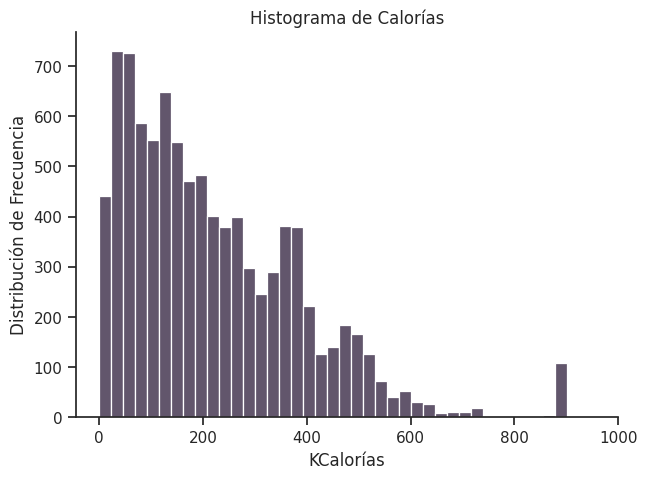

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(data=food, x="Energy_kcal")
ax.set_xticks([0, 200, 400, 600, 800, 1000])
plt.title("Histograma de Calorías")
plt.xlabel("KCalorías")
plt.ylabel("Distribución de Frecuencia")

### La manera en que se distribuyen las calorías de los alimentos presentes en el dataset nos indica que tienen una distribución asimétrica hacia la izquierda, por lo tanto se puede concluir que la cantidad de alimentos con exceso de calorías son un grupo reducido, y sobre los cuales hay que prestar especial atención.

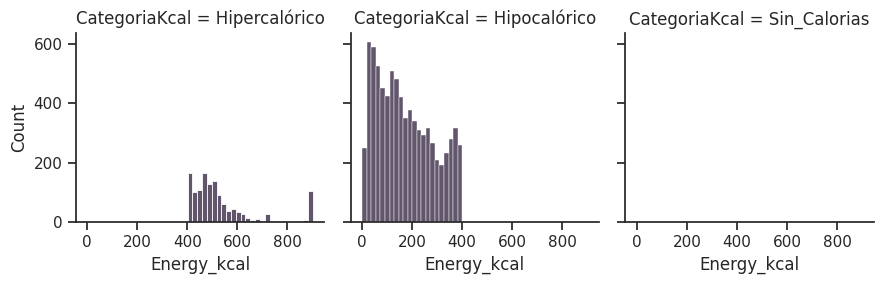

In [ ]:
g = sns.FacetGrid(food, col="CategoriaKcal")
g.map(sns.histplot, "Energy_kcal")

##Observaciones

Aparentemente la variable dependiente no presenta la apariencia de una distribución Normal.

La variable objetivo o dependiente concentra la mayor cantidad de sus datos entre 86 y 330. A simple vista no parece una distribución normal.

In [ ]:
food.columns

Index(['NDB_No', 'Descrip', 'Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg', 'CategoriaKcal'],
      dtype='object')

In [ ]:
Features = ['Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Sodium_mg']

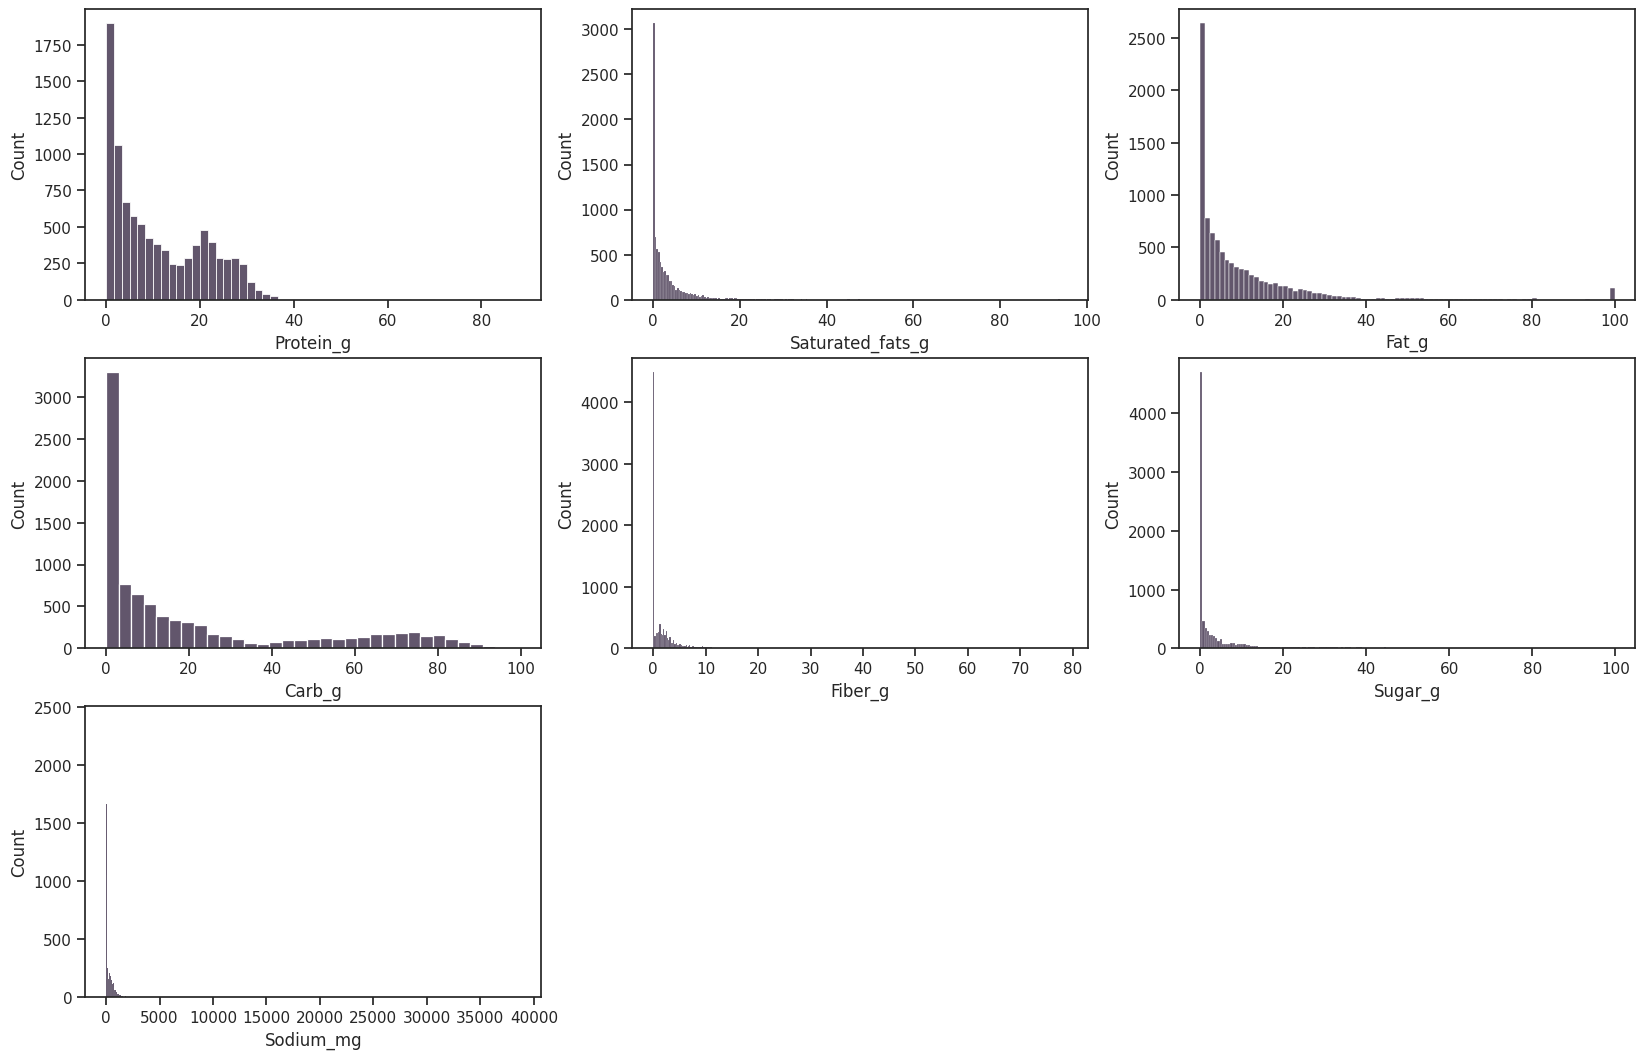

In [ ]:
enumerateFeatures = list(enumerate(Features))
plt.figure(figsize=(20,40))
for i in (enumerateFeatures):
  plt.subplot(9, 3, i[0]+1)
  sns.histplot(data=food, x=i[1])

## En estos gráficos podemos ver la composición de las diferentes cualidades nutricionales estadisticamente. Todas presentan distribuciones estadísticas asimétricas, es decir no Normales.

##Análisis Bivariado

<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")
<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")
<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")
<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")
<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")
<ipython-input-58-25f680441414>:5: UserWarning: Ignoring `palette` because no `hue` variab

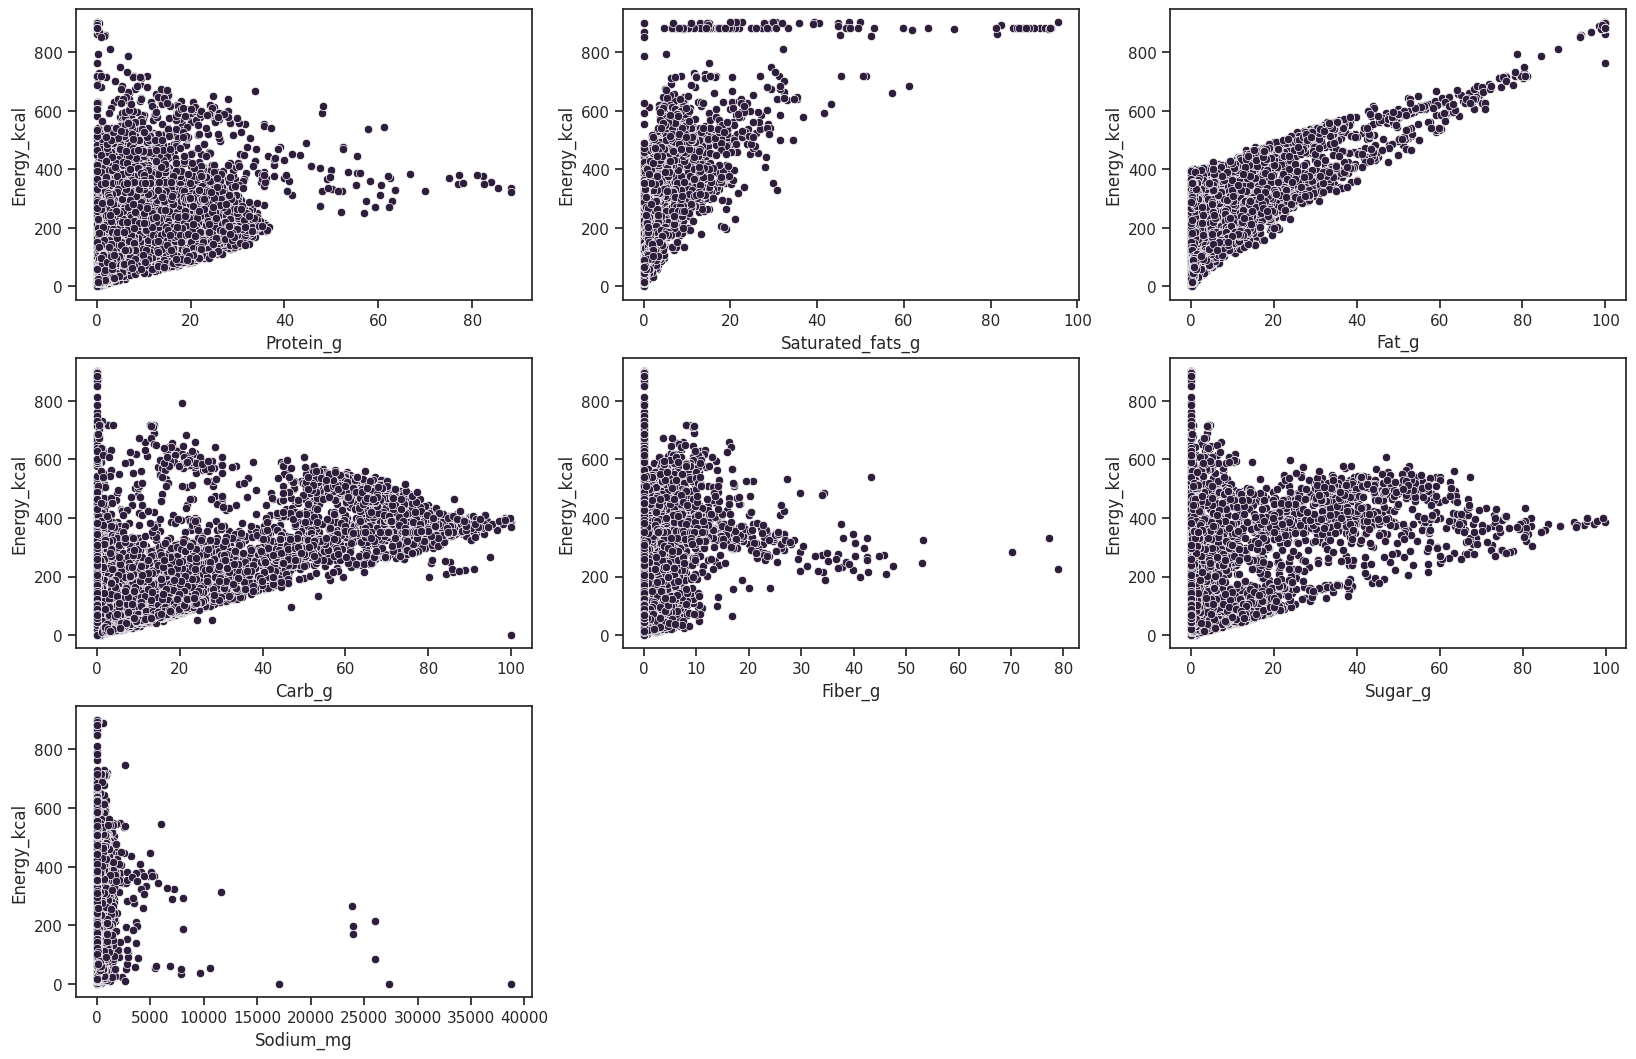

In [ ]:
enumerateFeatures = list(enumerate(Features))
plt.figure(figsize=(20,40))
for i in (enumerateFeatures):
  plt.subplot(9, 3, i[0]+1)
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", palette="mako")

## Observaciones, Hallazgos o Insights


1.   La variable que aparentemente más relación lineal tiene con la variable Kcal es "Fat_g" donde se nota marcadamente la relación.
2.   Si bien no obedece a una correlación lineal, a medida que aumenta el contenido de proteínas, también aumentan las calorías.
3. Se observa que a mayor contenido de grasas saturadas, mayor es la cantidad de calorías.
4. Excepto por algunos datos escasos que denominamos outliers, existe una relación directa entre los carbohidratos y las calorías, pero el gráfico nos da la pauta que no es la variable más determinante, porque también evidencia que algunos alimentos con menor carbohidratos tienen menos calorías.
5. La misma relación positiva observamos entre las azúcares y las calorías.
6. Las demás variables aparentan no tener correlación con la variable Calorías.




In [ ]:
#En base al gráfico, clasifico los alimentos de acuerdo a su composición de grasas y calorías en 4 grupos
food.loc[:, "Clasificacion2"] = "Altos en grasas no calóricos"
food.loc[(food.Energy_kcal < 400) & (food.Fat_g < 40), "Clasificacion2"] = "Saludables"
food.loc[(food.Energy_kcal >= 400) & (food.Fat_g < 40), "Clasificacion2"] = "Calóricos bajo en grasas"
food.loc[(food.Energy_kcal >= 400) & (food.Fat_g >= 40), "Clasificacion2"] = "No saludables"

Text(0.5, 1.0, 'Relación entre Grasas y Calorías')

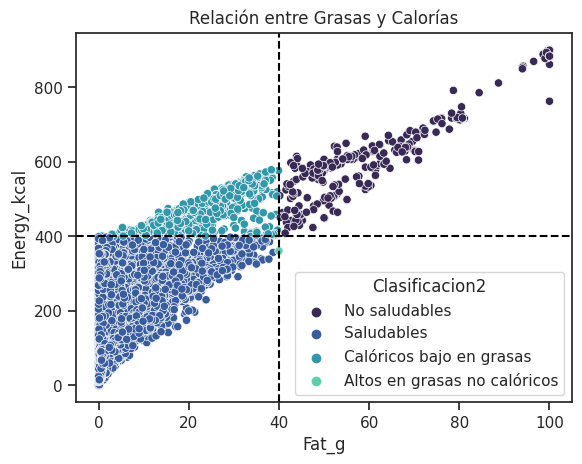

In [ ]:
#Gráfico de dispersión que analiza la relación entre grasas y calorías
sns.scatterplot(data=food, x="Fat_g", y="Energy_kcal", hue="Clasificacion2", palette="mako")
plt.axvline(40, ls="--", color="black")
plt.axhline(400, ls="--", color="black")
plt.title("Relación entre Grasas y Calorías")

## En base al gráfico anterior que correlaciona las calorías con las grasas, podemos evidenciar una alta correlación entre esas dos variables y  podemos clasificar e identificar a los alimentos que son altos en grasas y calorías y evitar su consumo.

In [ ]:
#detección de posible valor atípico
outlier2 = food.loc[(food.Energy_kcal < 800) & (food.Fat_g == 100)]

In [ ]:
outlier2

NDB_No             Descrip  Energy_kcal  Protein_g  Saturated_fats_g  \
691   4531  oil soybn lecithin        763.0        0.0            15.005   

     Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  ...  Riboflavin_mg  \
691  100.0     0.0      0.0      0.0         0.0  ...            0.0   

    Niacin_mg  VitB6_mg  Folate_mcg  VitB12_mcg  VitA_mcg  VitE_mg  VitD2_mcg  \
691       0.0       0.0         0.0         0.0       0.0     8.18        0.0   

     CategoriaKcal  Clasificacion2  
691  Hipercalórico   No saludables  

[1 rows x 31 columns]

In [ ]:
#guardo en la variable saludables un subdataset
saludables = food.loc[(food.Energy_kcal < 400) & (food.Fat_g < 40)]

In [ ]:
food.groupby("Clasificacion2").mean()

<ipython-input-64-55a61cc9a629>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food.groupby("Clasificacion2").mean()


Energy_kcal  Protein_g  Saturated_fats_g  \
Clasificacion2                                                           
Altos en grasas no calóricos   361.500000   0.685000          6.304000   
Calóricos bajo en grasas       468.540880   8.630350          7.679453   
No saludables                  680.762056   8.899576         19.388310   
Saludables                     171.091015  11.744214          2.051570   

                                  Fat_g     Carb_g   Fiber_g    Sugar_g  \
Clasificacion2                                                            
Altos en grasas no calóricos  40.000000   0.500000  0.000000   0.000000   
Calóricos bajo en grasas      21.668072  61.324611  3.478171  24.181720   
No saludables                 70.188408   7.788249  2.919363   1.672679   
Saludables                     6.072781  17.623800  1.963090   4.743560   

                              Calcium_mg   Iron_mg  Phosphorus_mg  ...  \
Clasificacion2                                                     ...   
Altos en grasas no calóricos   12.000000  0.020000      17.500000  ...   
Calóricos bajo en grasas      117.548740  3.740591     172.324206  ...   
No saludables                  65.790451  1.984111     204.341459  ...   
Saludables                     69.013865  2.574964     150.230105  ...   

                              Selenium_mcg   VitC_mg  Thiamin_mg  \
Clasificacion2                                                     
Altos en grasas no calóricos      1.400000  0.050000    0.009000   
Calóricos bajo en grasas          7.385082  5.801972    0.332468   
No saludables                    15.465889  0.324987    0.167469   
Saludables                       13.423519  9.349882    0.188256   

                              Riboflavin_mg  Niacin_mg  VitB6_mg  Folate_mcg  \
Clasificacion2                                                                 
Altos en grasas no calóricos       0.015000   0.015000  0.006000    0.500000   
Calóricos bajo en grasas           0.297519   3.469192  0.203781   17.362913   
No saludables                      0.121690   2.371507  0.210101   30.920769   
Saludables                         0.223512   3.326068  2.173352   39.122005   

                              VitB12_mcg    VitA_mcg  VitD2_mcg  
Clasificacion2                                                   
Altos en grasas no calóricos    0.105000  413.500000   0.000000  
Calóricos bajo en grasas        0.399496   68.477711   0.522213  
No saludables                   0.352573  165.284218   1.126790  
Saludables                      1.256010   87.825292   0.286904  

[4 rows x 25 columns]

Text(0.5, 1.0, 'Relación entre Azúcares y Calorías')

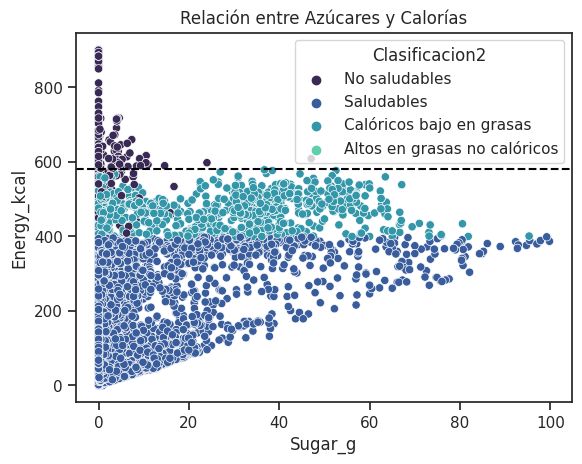

In [ ]:
#Gráfico de dispersión que analiza la relación entre azúcares y calorías
sns.scatterplot(data=food, x="Sugar_g", y="Energy_kcal", hue="Clasificacion2", palette="mako")
plt.axhline(580, ls="--", color="black")
plt.title("Relación entre Azúcares y Calorías")

## En base al gráfico anterior que correlaciona las calorías con los azúcares, podemos evidenciar una cierta correlación entre ambas variables. Sin embargo los alimentos que presentan mayores calorías no necesariamente son las que más azúcares tienen, por lo tanto no explican por si solos que los alimentos con alto contenido de azúcares sean no saludables. En otras palabras podemos estar consumiendo alimentos ricos en azúcares pero no por eso estar consumiendo alimentos no saludables.

Text(0.5, 1.0, 'Relación entre Sodio y Calorías')

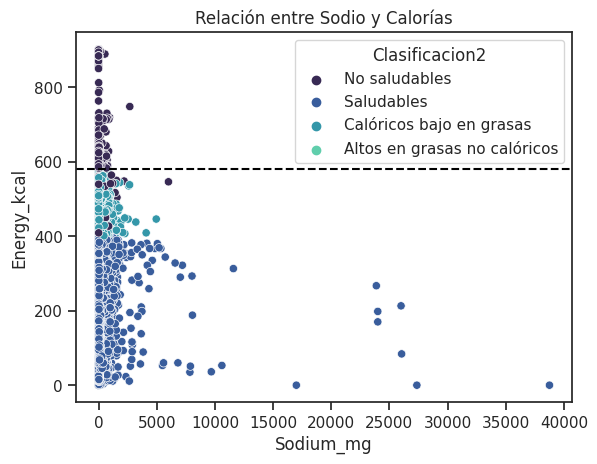

In [ ]:
sns.scatterplot(data=food, x="Sodium_mg", y="Energy_kcal", hue="Clasificacion2", palette="mako")
plt.axhline(580, ls="--", color="black")
plt.title("Relación entre Sodio y Calorías")

## En base al gráfico anterior que correlaciona las calorías con el sodio, podemos evidenciar que no existe una correlación entre ambas variables. De hecho los alimentos que presentan mayores calorías no necesariamente son las que más sodio tienen, por lo tanto no explican por si solos que los alimentos con alto contenido de sodio sean no saludables. No obstante no sean la causa principal que expliquen las calorías en los alimentos, debe moderarse su ingesta ya que el consumo excesivo de sal puede elevar la presión arterial, lo que aumenta el riesgo de enfermedades cardiovasculares como la hipertensión, enfermedades del corazón y accidentes cerebrovasculares.

In [ ]:
food.groupby("Clasificacion2").mean()

<ipython-input-67-55a61cc9a629>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food.groupby("Clasificacion2").mean()


Energy_kcal  Protein_g  Saturated_fats_g  \
Clasificacion2                                                           
Altos en grasas no calóricos   361.500000   0.685000          6.304000   
Calóricos bajo en grasas       468.540880   8.630350          7.679453   
No saludables                  680.762056   8.899576         19.388310   
Saludables                     171.091015  11.744214          2.051570   

                                  Fat_g     Carb_g   Fiber_g    Sugar_g  \
Clasificacion2                                                            
Altos en grasas no calóricos  40.000000   0.500000  0.000000   0.000000   
Calóricos bajo en grasas      21.668072  61.324611  3.478171  24.181720   
No saludables                 70.188408   7.788249  2.919363   1.672679   
Saludables                     6.072781  17.623800  1.963090   4.743560   

                              Calcium_mg   Iron_mg  Phosphorus_mg  ...  \
Clasificacion2                                                     ...   
Altos en grasas no calóricos   12.000000  0.020000      17.500000  ...   
Calóricos bajo en grasas      117.548740  3.740591     172.324206  ...   
No saludables                  65.790451  1.984111     204.341459  ...   
Saludables                     69.013865  2.574964     150.230105  ...   

                              Selenium_mcg   VitC_mg  Thiamin_mg  \
Clasificacion2                                                     
Altos en grasas no calóricos      1.400000  0.050000    0.009000   
Calóricos bajo en grasas          7.385082  5.801972    0.332468   
No saludables                    15.465889  0.324987    0.167469   
Saludables                       13.423519  9.349882    0.188256   

                              Riboflavin_mg  Niacin_mg  VitB6_mg  Folate_mcg  \
Clasificacion2                                                                 
Altos en grasas no calóricos       0.015000   0.015000  0.006000    0.500000   
Calóricos bajo en grasas           0.297519   3.469192  0.203781   17.362913   
No saludables                      0.121690   2.371507  0.210101   30.920769   
Saludables                         0.223512   3.326068  2.173352   39.122005   

                              VitB12_mcg    VitA_mcg  VitD2_mcg  
Clasificacion2                                                   
Altos en grasas no calóricos    0.105000  413.500000   0.000000  
Calóricos bajo en grasas        0.399496   68.477711   0.522213  
No saludables                   0.352573  165.284218   1.126790  
Saludables                      1.256010   87.825292   0.286904  

[4 rows x 25 columns]

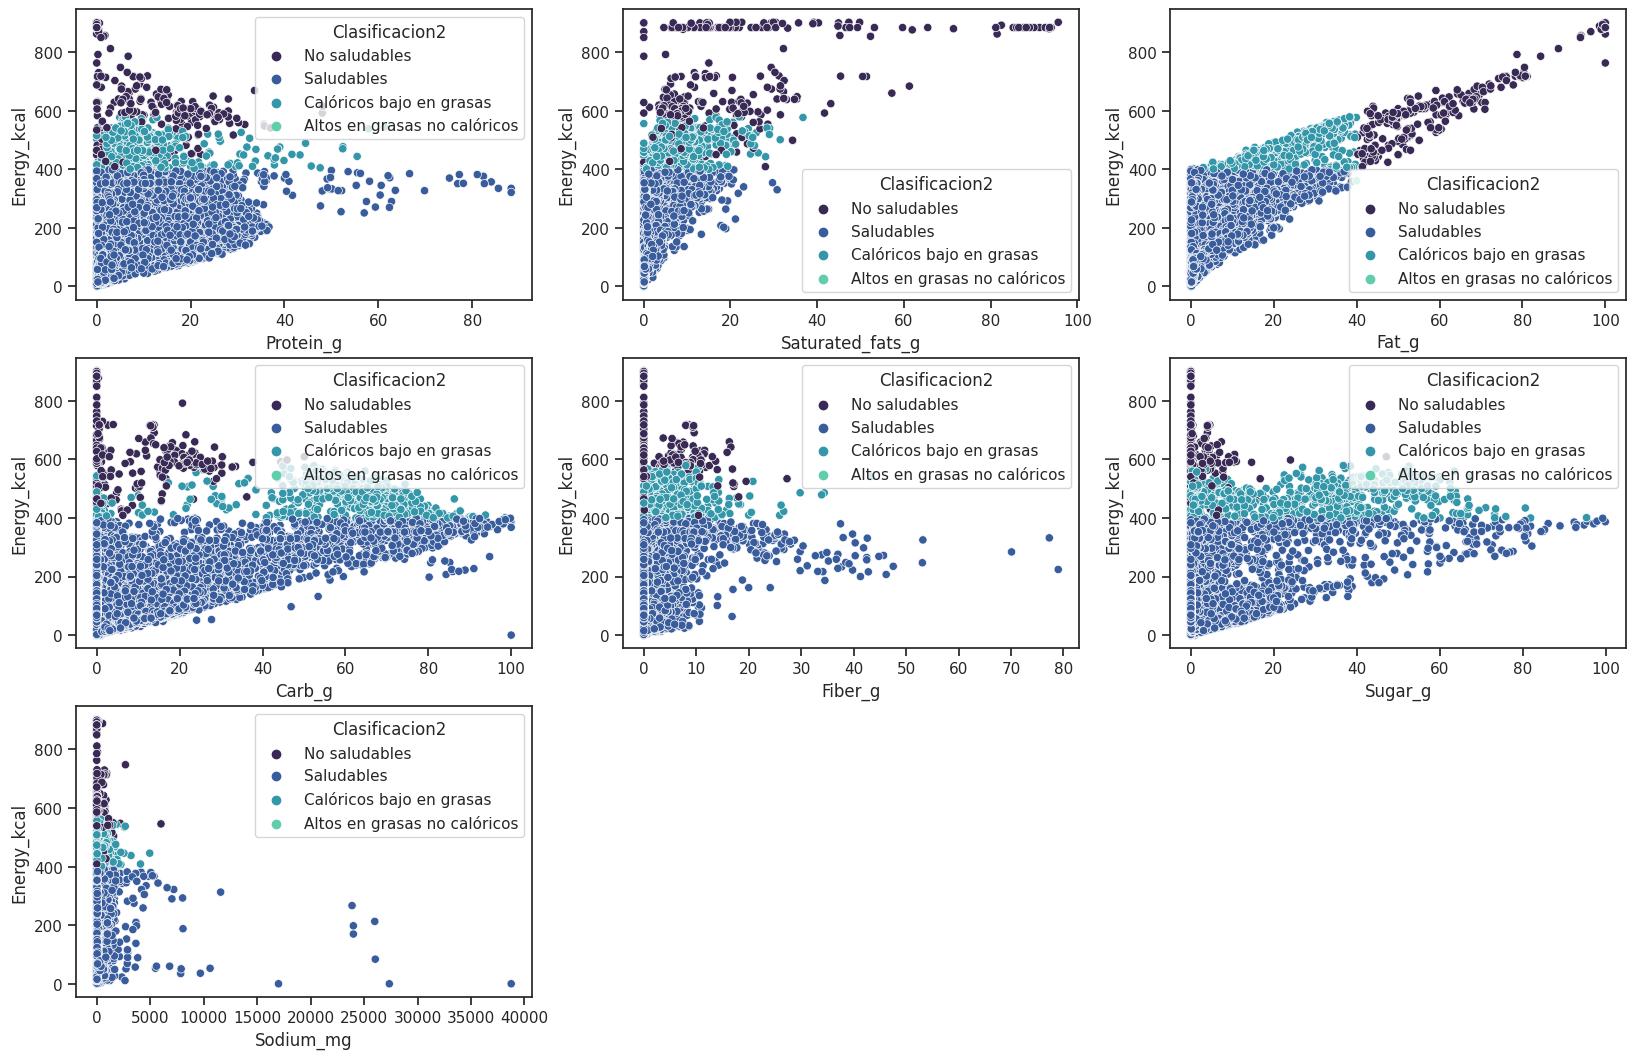

In [ ]:
enumerateFeatures = list(enumerate(Features))
plt.figure(figsize=(20,40))
for i in (enumerateFeatures):
  plt.subplot(9, 3, i[0]+1)
  sns.scatterplot(data=food, x=i[1], y="Energy_kcal", hue="Clasificacion2", palette="mako")

In [ ]:
#Guardo en la variable nosaludables el subdataset
nosaludables = food.loc[(food.Energy_kcal >= 400) & (food.Fat_g >= 40)]

In [ ]:
#Guardo en la variable caloricasbajoengrasa el subdataset
caloricosbajoengrasa = food.loc[(food.Energy_kcal >= 400) & (food.Fat_g < 40)]

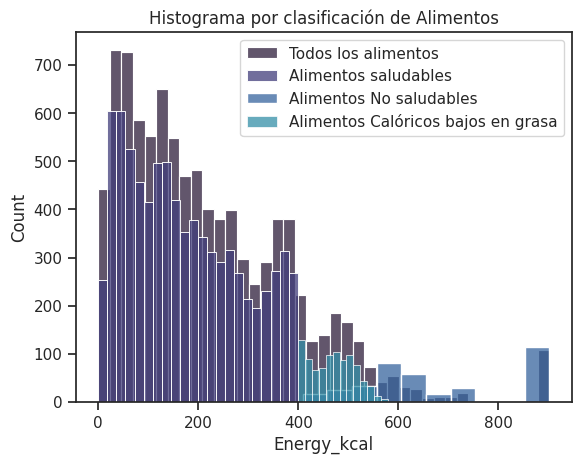

In [ ]:
sns.set_palette("mako")

sns.histplot(data=food, x="Energy_kcal", label="Todos los alimentos")
sns.histplot(data=saludables, x="Energy_kcal", label="Alimentos saludables")
sns.histplot(data=nosaludables, x="Energy_kcal", label="Alimentos No saludables")
sns.histplot(data=caloricosbajoengrasa, x="Energy_kcal", label="Alimentos Calóricos bajos en grasa")
plt.title("Histograma por clasificación de Alimentos")
plt.legend()
plt.show()


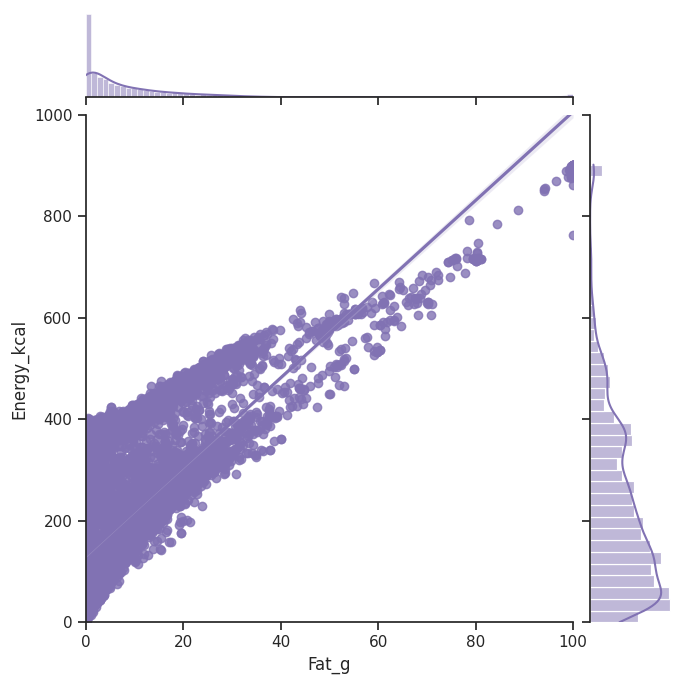

In [ ]:
g = sns.jointplot(x="Fat_g", y="Energy_kcal", data=food,
                  kind="reg", truncate=False,
                  xlim=(0, 100), ylim=(0, 1000),
                  color="m", height=7)

Text(0.5, 1.0, 'Boxplot por clasificación de Alimentos')

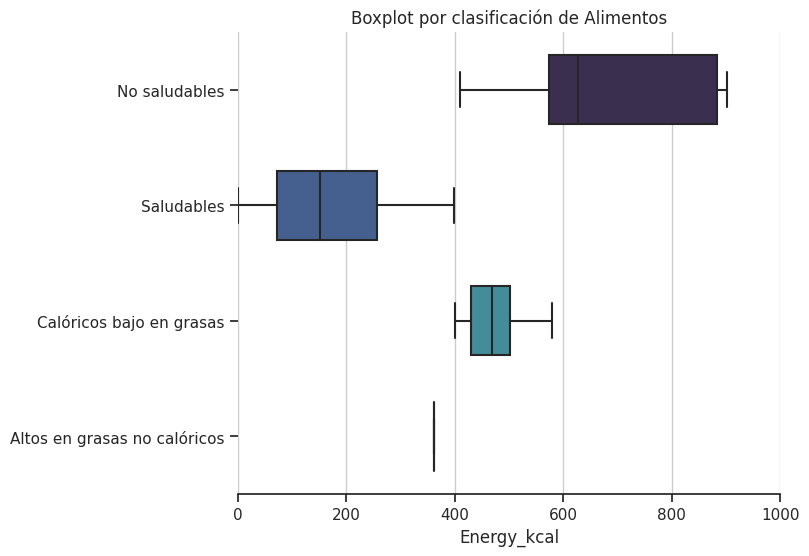

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
plt.xlim(0,1000)


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Energy_kcal", y="Clasificacion2", data=food,
            whis=[0, 100], width=.6, palette="mako")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=False, left=True)
plt.title("Boxplot por clasificación de Alimentos")



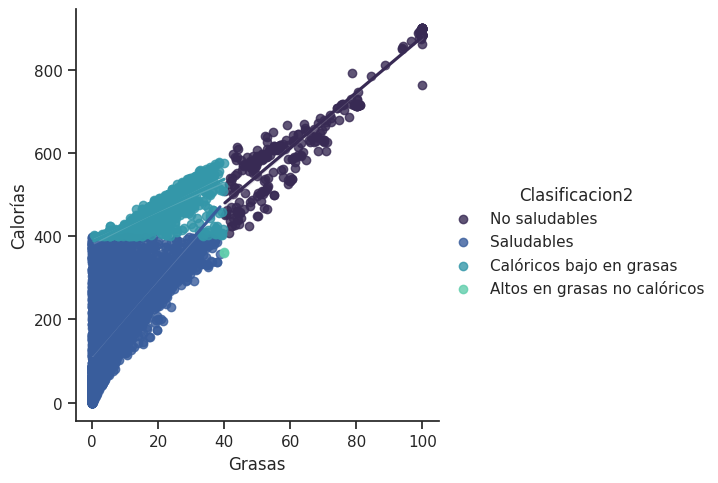

In [ ]:
sns.set_theme(style="ticks")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=food,
    x="Fat_g", y="Energy_kcal", hue="Clasificacion2",
    height=5, palette="mako"
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Grasas", "Calorías")

## El análisis exahustivo del data set, no permitió poder clasificar a los alimentos de acuerdo a la composición de grasas y calorías, lo que nos alerta a simple vista a modo de eliminar o reducir su consumo, propendiendo a mejorar el hábito alimentario.

##Análisis Multivariado

In [ ]:
food.corr()

<ipython-input-75-d28bb2ecff19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  food.corr()


Energy_kcal  Protein_g  Saturated_fats_g     Fat_g  \
Energy_kcal          1.000000   0.123942          0.618309  0.806055   
Protein_g            0.123942   1.000000          0.056465  0.069703   
Saturated_fats_g     0.618309   0.056465          1.000000  0.765033   
Fat_g                0.806055   0.069703          0.765033  1.000000   
Carb_g               0.502243  -0.294872         -0.036133 -0.038775   
Fiber_g              0.200460  -0.068246         -0.075656 -0.018583   
Sugar_g              0.317882  -0.267470          0.072857  0.005567   
Calcium_mg           0.132143   0.047263          0.037049  0.027434   
Iron_mg              0.198867   0.131324         -0.048102 -0.027308   
Phosphorus_mg        0.212798   0.455251          0.037837  0.085533   
Potassium_mg         0.086121   0.248793         -0.055625 -0.036034   
Sodium_mg            0.063227  -0.001423          0.004933  0.017203   
Zinc_mg              0.129291   0.421760          0.037637  0.044183   
Copper_mcg           0.106288   0.155668         -0.002575  0.050723   
Manganese_mg         0.039914   0.033059         -0.012805  0.002471   
Selenium_mcg         0.055301   0.390645          0.016010  0.037717   
VitC_mg             -0.040125  -0.072510         -0.049304 -0.060547   
Thiamin_mg           0.195355   0.104719         -0.032006  0.006763   
Riboflavin_mg        0.161669   0.211560         -0.021223 -0.022708   
Niacin_mg            0.183186   0.395972         -0.032306 -0.007756   
VitB6_mg            -0.070258   0.089906         -0.041484 -0.053657   
Folate_mcg          -0.051274   0.117513         -0.060051 -0.059380   
VitB12_mcg          -0.004838   0.245252         -0.003358 -0.014417   
VitA_mcg             0.025885   0.026153          0.013410  0.025704   
VitD2_mcg            0.076817   0.018031          0.046211  0.074658   

                    Carb_g   Fiber_g   Sugar_g  Calcium_mg   Iron_mg  \
Energy_kcal       0.502243  0.200460  0.317882    0.132143  0.198867   
Protein_g        -0.294872 -0.068246 -0.267470    0.047263  0.131324   
Saturated_fats_g -0.036133 -0.075656  0.072857    0.037049 -0.048102   
Fat_g            -0.038775 -0.018583  0.005567    0.027434 -0.027308   
Carb_g            1.000000  0.436181  0.614954    0.185724  0.335639   
Fiber_g           0.436181  1.000000  0.094302    0.247401  0.374426   
Sugar_g           0.614954  0.094302  1.000000    0.121574  0.108318   
Calcium_mg        0.185724  0.247401  0.121574    1.000000  0.352206   
Iron_mg           0.335639  0.374426  0.108318    0.352206  1.000000   
Phosphorus_mg     0.074279  0.165456 -0.056052    0.557759  0.225025   
Potassium_mg      0.120790  0.355210 -0.007466    0.255497  0.238371   
Sodium_mg         0.079651  0.001165  0.009641    0.171415  0.027021   
Zinc_mg          -0.006608  0.086673 -0.028523    0.150584  0.383470   
Copper_mcg        0.062550  0.210805 -0.010661    0.093127  0.187171   
Manganese_mg      0.058019  0.116967  0.009195    0.074084  0.096666   
Selenium_mcg     -0.119835 -0.033363 -0.131669    0.012469  0.073773   
VitC_mg           0.064356  0.065326  0.051453    0.093334  0.058009   
Thiamin_mg        0.277530  0.196943  0.092931    0.134523  0.378716   
Riboflavin_mg     0.222605  0.137289  0.117667    0.216965  0.478507   
Niacin_mg         0.161748  0.107110  0.023504    0.125564  0.477702   
VitB6_mg         -0.077909 -0.043905 -0.048277   -0.016213 -0.021338   
Folate_mcg       -0.044156  0.069141 -0.066367    0.019903  0.040068   
VitB12_mcg       -0.089799 -0.057439 -0.049162    0.013057  0.175343   
VitA_mcg          0.000524  0.004478  0.008494    0.036079  0.101247   
VitD2_mcg         0.016987 -0.013168  0.055902    0.066102  0.078308   

                  Phosphorus_mg  ...  Selenium_mcg   VitC_mg  Thiamin_mg  \
Energy_kcal            0.212798  ...      0.055301 -0.040125    0.195355   
Protein_g              0.455251  ...      0.390645 -0.072510    0.104719   
Saturated_fats_g       0.037837  ...      0.

<ipython-input-76-5e4a57b0736d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(food.corr(), annot=True, cmap='mako')


<Axes: >

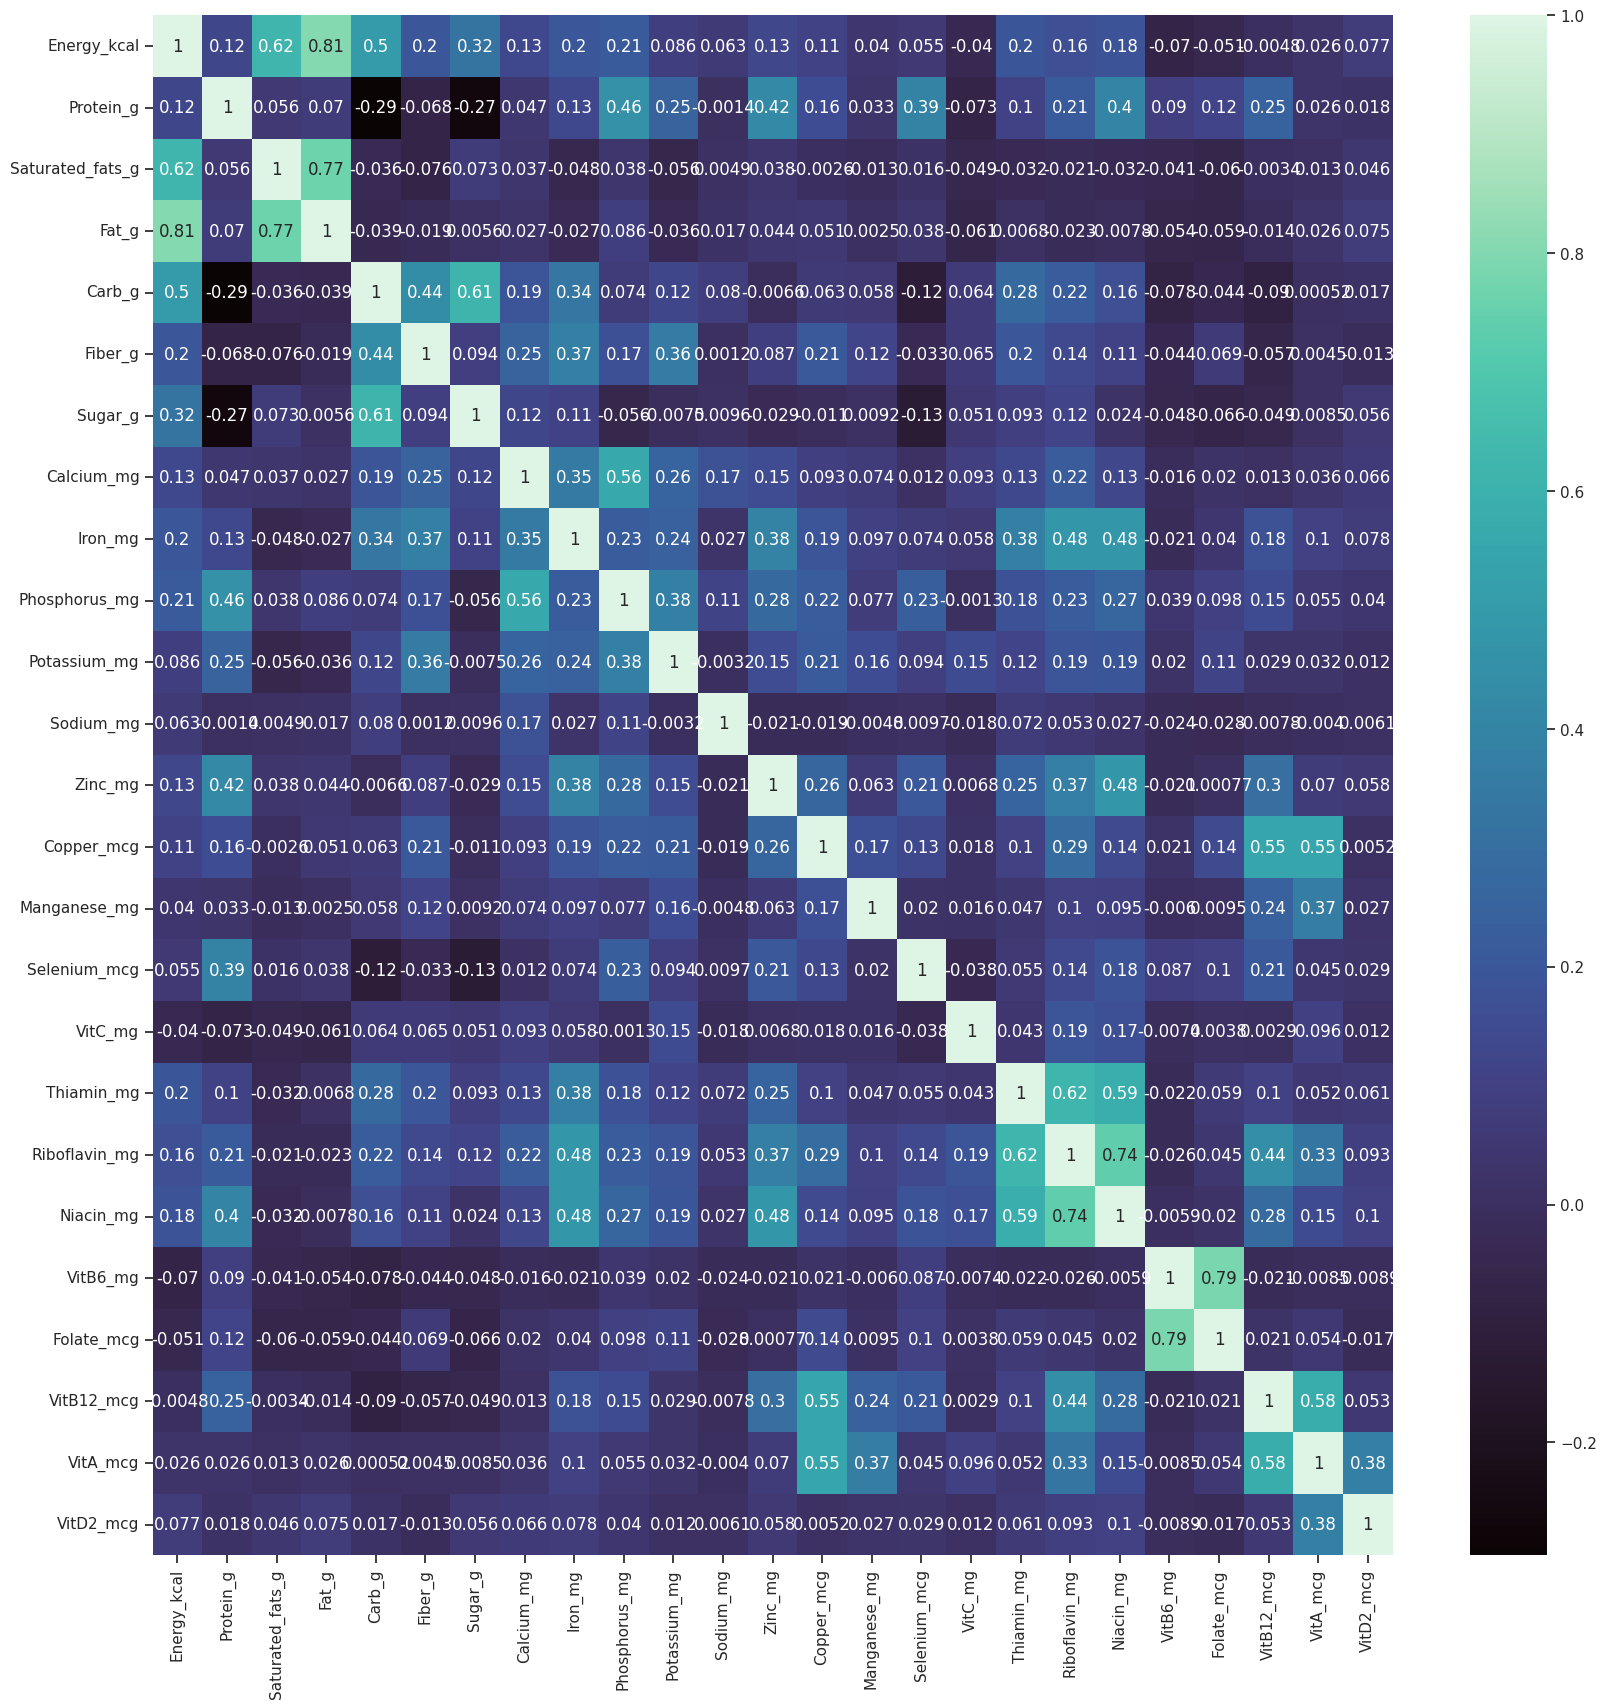

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(food.corr(), annot=True, cmap='mako')

### Podemos ver las correlación que existe entre cada una de las variables. Esto puede servir para hacer sub grupos de alimentos, y clasificarlos (Saludables, Nocivos, bajo en sodio, bajo en azucar, que aportan Fibra).

In [ ]:
counts = food['Clasificacion2'].value_counts()
percentages = counts / len(food) * 100
print(percentages)

Saludables                      86.134364
Calóricos bajo en grasas         9.798240
No saludables                    4.045933
Altos en grasas no calóricos     0.021464
Name: Clasificacion2, dtype: float64


# Conclusiones

### Ayudar en el objetivo de bajar la obesidad, reducir los problemas cardíacos y concientizar acerca de los hábitos alimentarios, debería ser cada vez más prioridad en la sociedad. Este es el objetivo perseguido. Es por ellos que resulta imperante la clasificación y/o agrupación de alimentos y la medición de las calorias consumidas. Tarea a realizar con la creación de un modelo de machine learning para tal fin. Servir de soporte para estas causas a través de un modelo que clasifique los alimentos, que los agrupe y que prediga las calorías que contiene. Servir de apoyo a los profesionales en nutrición con así también a los usuarios que necesiten estructurar una dieta con ciertos requisitos.